In [3]:
import scipy as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fire = pd.read_csv('forestfires.csv')

fire.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
print(fire.isnull().sum())


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


Text(0, 0.5, 'frequency')

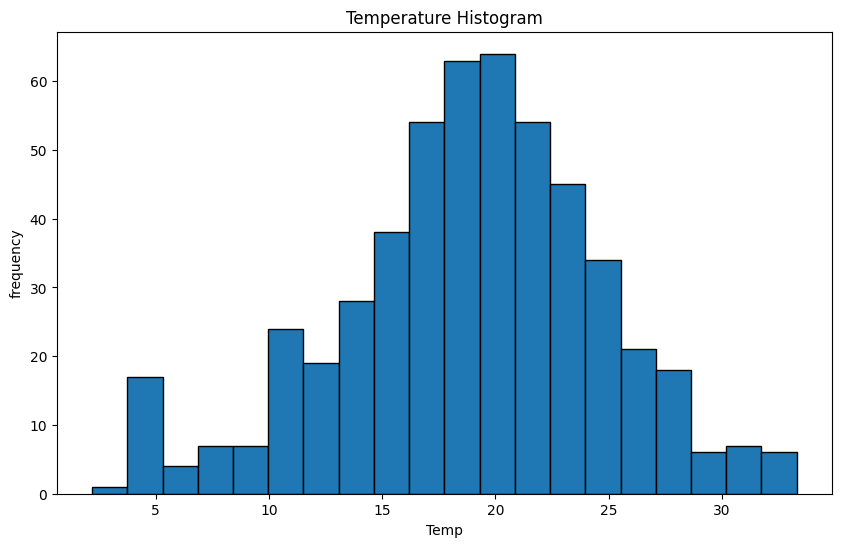

In [10]:
plt.figure(figsize = (10,6))
plt.hist(fire['temp'], bins=20, edgecolor= 'k')
plt.title('Temperature Histogram')
plt.xlabel('Temp')
plt.ylabel('frequency')

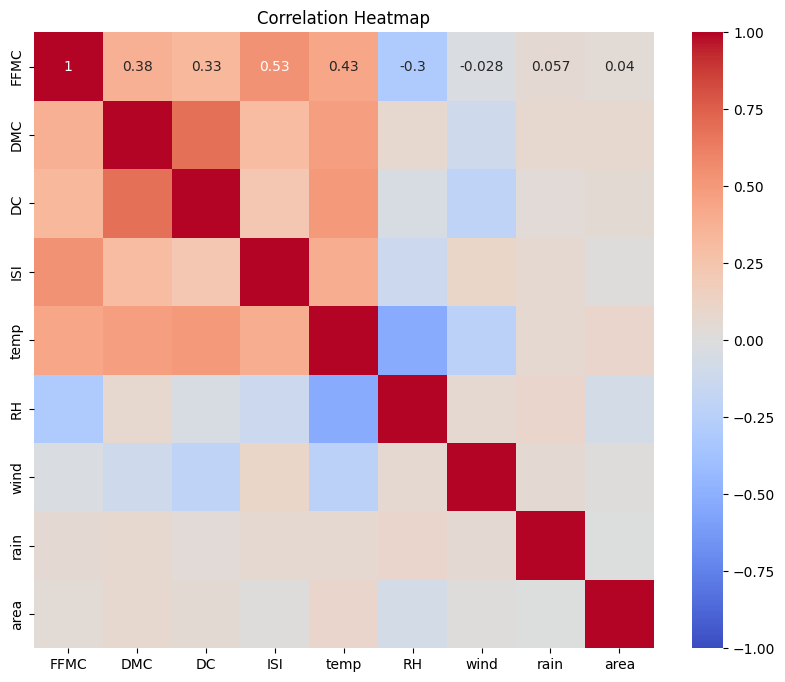

In [20]:
plt.figure(figsize=(10,8))
corr_matrix= fire.drop(columns=['month','day','X','Y']).corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', vmin= -1, vmax =1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


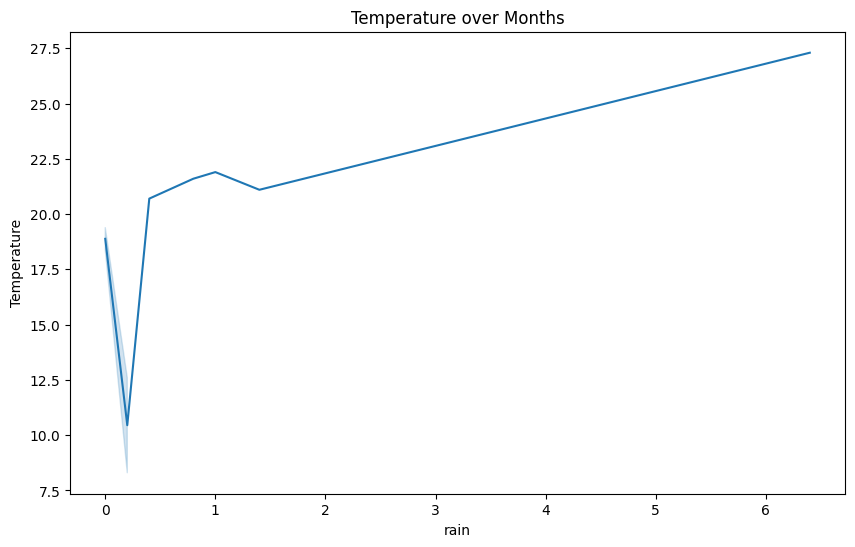

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='rain', y='temp', data=fire)
plt.title('Temperature over Months')
plt.xlabel('rain')
plt.ylabel('Temperature')
plt.show()

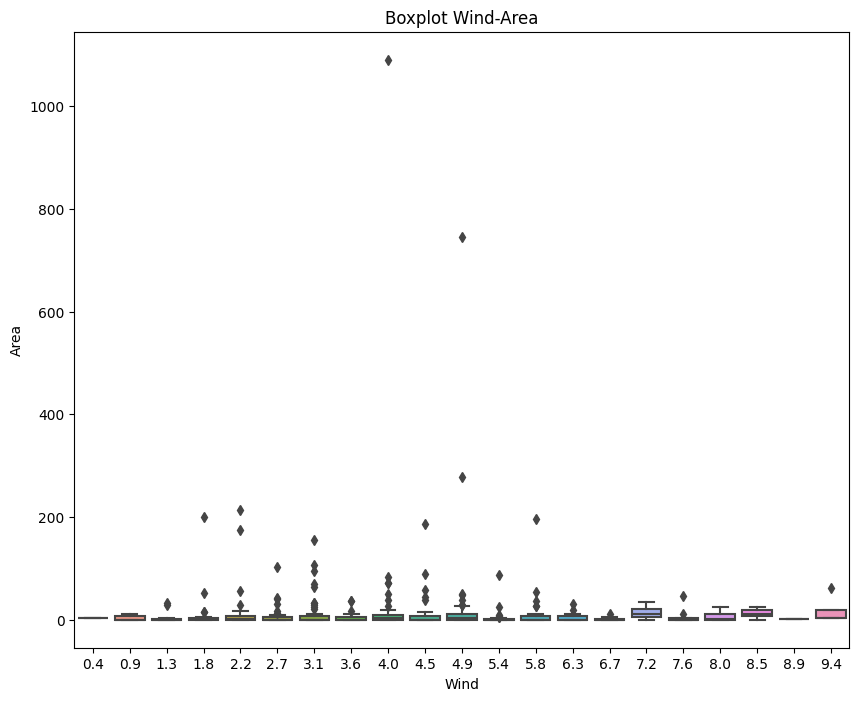

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='wind', y='area', data= fire)
plt.title('Boxplot Wind-Area')
plt.xlabel('Wind')
plt.ylabel('Area')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

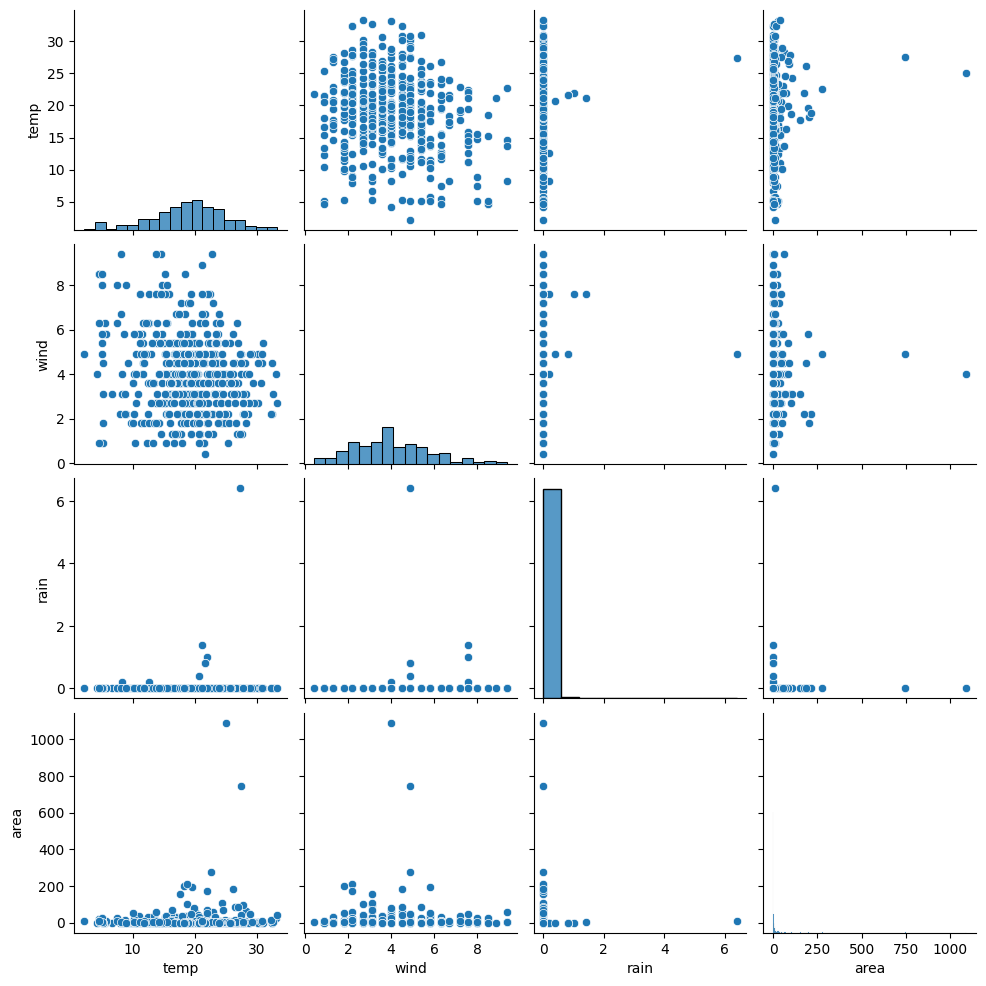

In [26]:
sns.pairplot(fire[['temp','wind','rain','area']])
plt.show()

In [29]:
#Normality Tests(temp)
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

stat, p_value= shapiro(fire['temp'])
print(f"Shapiro Wilk Test(temp) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")
stat, p_value= normaltest(fire['temp'])
print(f"D'Agostino's k^2 Test(temp) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")

result = anderson(fire['temp'])
print(f'Anderson-Darling Test stat: {result.statistic}')
for i in range(len(result.critical_values)):
    print(f'{result.significance_level[i]}%: {result.critical_values[i]}')

Shapiro Wilk Test(temp) /stat: 0.9868018627166748 ,/ p-value: 0.00012556937872432172 
-------------------------------------------------
D'Agostino's k^2 Test(temp) /stat: 9.694603174021756 ,/ p-value: 0.007849530271443372 
-------------------------------------------------
Anderson-Darling Test stat: 1.8120524253592976
15.0%: 0.572
10.0%: 0.651
5.0%: 0.781
2.5%: 0.911
1.0%: 1.084


In [30]:
#Normality Tests(wind)
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

stat, p_value= shapiro(fire['wind'])
print(f"Shapiro Wilk Test(wind) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")
stat, p_value= normaltest(fire['wind'])
print(f"D'Agostino's k^2 Test(wind) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")

result = anderson(fire['wind'])
print(f'Anderson-Darling Test(wind) stat: {result.statistic}')
for i in range(len(result.critical_values)):
    print(f'{result.significance_level[i]}%: {result.critical_values[i]}')

Shapiro Wilk Test(wind) /stat: 0.9672695398330688 ,/ p-value: 2.493337536435547e-09 
-------------------------------------------------
D'Agostino's k^2 Test(wind) /stat: 25.242052914167786 ,/ p-value: 3.3018539075047587e-06 
-------------------------------------------------
Anderson-Darling Test(wind) stat: 4.343210853999835
15.0%: 0.572
10.0%: 0.651
5.0%: 0.781
2.5%: 0.911
1.0%: 1.084


In [32]:
#correlation analyze

cott_matrix=fire.drop(columns=['month','day']).corr()
print(corr_matrix['area'].sort_values(ascending=False))

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


In [41]:
#t-Test
from scipy.stats import ttest_ind
median_wind = fire['wind'].median()

group1 = fire[fire['wind'] > median_wind]['area']
group2 = fire[fire['wind'] <= median_wind]['area']

t_stat, p_value = ttest_ind(group1, group2)
print(f't-Test stat: {t_stat}, p-value: {p_value}')

t-Test stat: 0.09739650202052481, p-value: 0.9224494147485702


In [42]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(fire['month'], fire['day'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-Square stat: {chi2}, p-value: {p}')


Chi-Square stat: 64.2383177767438, p-value: 0.5384475410453669


In [45]:
#pearson Corelation 
import pandas as pd
from scipy.stats import pearsonr

corr, p_value = pearsonr(fire['temp'], fire['area'])
print(f'Pearson Correlation Coefficient Temp-Area: {corr}, p_value: {p_value}')

Pearson Correlation Coefficient Temp-Area: 0.0978441073416845, p_value: 0.026101460579885907


In [50]:
#Spearman's Rank Correlation Test
from scipy.stats import spearmanr
corr, p_value = spearmanr(fire['RH'], fire['area'])
print(f'Spearman Rank Correlation Coeefficient  RH-Area: {corr}, p-value: {p_value}')

Spearman Rank Correlation Coeefficient  RH-Area: -0.02422120559867416, p-value: 0.5826757553732322


In [51]:
from scipy.stats import ks_2samp

# Example: Comparing the 'area' distributions between two different months
group1 = fire[fire['month'] == 'aug']['area']
group2 = fire[fire['month'] == 'sep']['area']

ks_stat, p_value = ks_2samp(group1, group2)
print(f'Kolmogorov-Smirnov Test Statisticv Month-Area(aug sep): {ks_stat}, p-value: {p_value}')


Kolmogorov-Smirnov Test Statisticv Month-Area(aug sep): 0.11236097067745197, p-value: 0.1917452232096789
